Clustering Challenge

Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Load the data

In [1]:
import pandas as pd

data = pd.read_csv('clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Principal Component Analysis

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(data)

pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

Visualise the transformed data

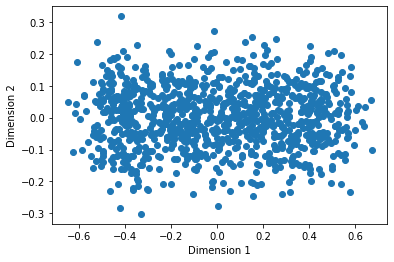

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Plot the WCSS for the model

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\

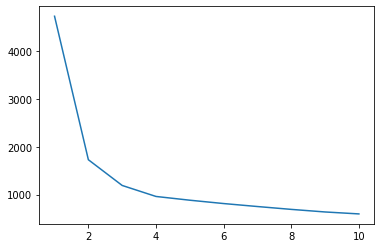

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data.values)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

Perform K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(data.values)
km_clusters

array([1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2,

Plot the Clusters

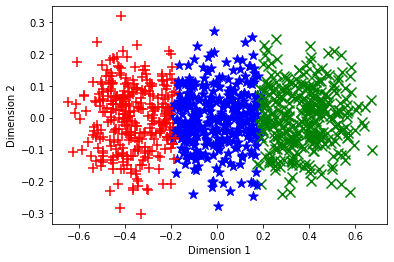

In [10]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'red'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

plot_clusters(features_2d, km_clusters)

Try Agglometrive Clusters

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters

array([1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0,

Plot the Agglomerative Clustering

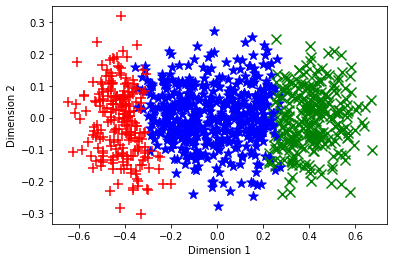

In [14]:
plot_clusters(features_2d, agg_clusters)